In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download muratkokludataset/rice-image-dataset

 94% 207M/219M [00:02<00:00, 136MB/s]
100% 219M/219M [00:02<00:00, 93.6MB/s]


In [6]:
! unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

### Importing Dependencies

In [8]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as img
import seaborn as sns
import PIL.Image as Image
import cv2
import os
import numpy as np
import pathlib


In [9]:
data_dir = "./Rice_Image_Dataset"
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('Rice_Image_Dataset')

In [10]:
arborio = list(data_dir.glob('Arborio/*'))[:400]
basmati = list(data_dir.glob('Basmati/*'))[:400]
ipsala = list(data_dir.glob('Ipsala/*'))[:400]
jasmine = list(data_dir.glob('Jasmine/*'))[:400]
karacadag = list(data_dir.glob('Karacadag/*'))[:400]

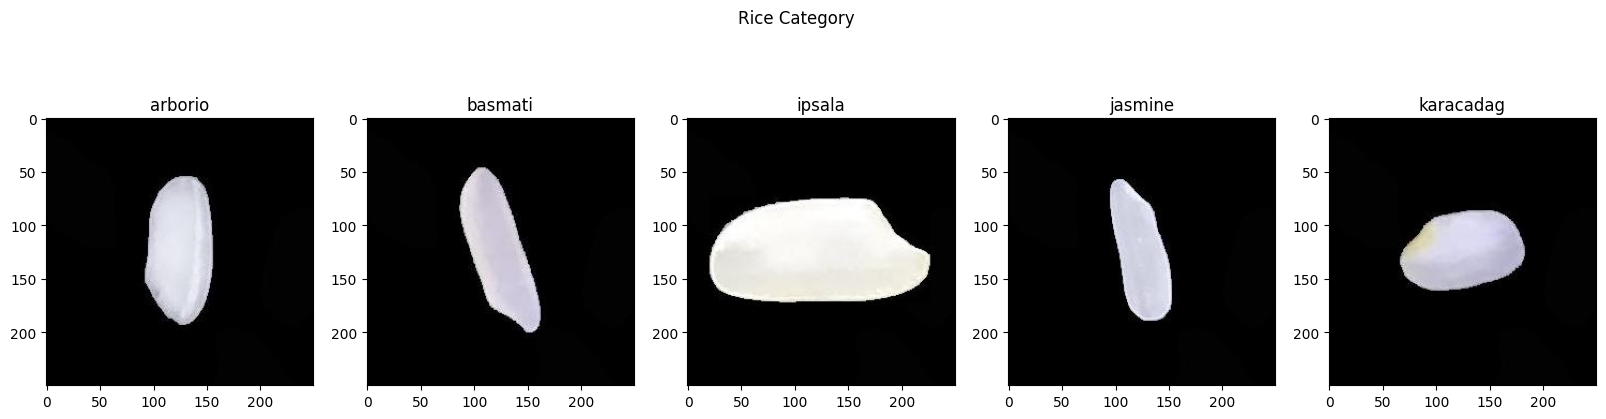

In [11]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category')
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio')
ax[1].set_title('basmati')
ax[2].set_title('ipsala')
ax[3].set_title('jasmine')
ax[4].set_title('karacadag')

ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

plt.show()

In [12]:
df_images = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala' : ipsala,
    'jasmine' : jasmine,
    'karacadag': karacadag
}

df_labels = {
    'arborio' : 0,
    'basmati' : 1,
    'ipsala' : 2,
    'jasmine' : 3,
    'karacadag': 4
}

In [13]:
img = cv2.imread(str(df_images['arborio'][0]))
img.shape

(250, 250, 3)

In [14]:
X, y = [], []
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224))
        X.append(resized_img)
        y.append(df_labels[label])

In [15]:
X = np.array(X)
X = X/255
y = np.array(y)

In [16]:
#Spliting into test val train
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

# Creating Model

In [17]:
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [18]:
mn_model = MobileNet(weights="imagenet",
                       include_top=False,
                       input_shape=(224, 224, 3)) #imports the mobilenet model and discards the last 1000 ne

17225924/17225924 [==============================] - 0s 0us/step


In [19]:
mn_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [20]:
mobile = MobileNet()
def prepare_image(file):
    img_path = './Rice_Image_Dataset'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

17225924/17225924 [==============================] - 1s 0us/step


In [21]:

top_model = Sequential()
top_model.add(Flatten(input_shape=mn_model.output_shape[1:]))
top_model.add(Dense(32, activation="relu"))
top_model.add(Dense(10, activation="softmax"))

top_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense (Dense)               (None, 32)                1605664   
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 1605994 (6.13 MB)
Trainable params: 1605994 (6.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
import tensorflow as tf
transfer_model = Sequential()
transfer_model.add(mn_model)
transfer_model.add(top_model)

transfer_model.layers[0].trainable = False
transfer_model.summary()

transfer_model.compile(
  optimizer="adam",
  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])


history = transfer_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 7, 7, 1024)        3228864   
 onal)                                                           
                                                                 
 sequential (Sequential)     (None, 10)                1605994   
                                                                 
Total params: 4834858 (18.44 MB)
Trainable params: 1605994 (6.13 MB)
Non-trainable params: 3228864 (12.32 MB)
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 68s 1s/step - loss: 0.7659 - acc: 0.8660 - val_loss: 0.2235 - val_acc: 0.9680
Epoch 2/10
47/47 [==============================] - 69s 1s/step - loss: 0.0404 - acc: 0.9893 - val_loss: 0.1841 - val_acc: 0.9840
Epoch 3/10
47/47 [==============================] - 71s 2s/step - loss: 0.0260 - acc: 0.9927 - val_loss: 0.1908 - val_acc: 0.9840
Epoch 4/10
47/47 [==============================] - 67s 1s/step - loss: 0.0093 - acc: 0.9973 - val_loss: 0.2186 - val_acc: 0.9840
Epoch 5/10
47/47 [==============================] - 68s 1s/step - loss: 0.0116 - acc: 0.9953 - val_loss: 0.1509 - val_acc: 0.9760
Epoch 6/10
47/47 [==============================] - 65s 1s/step - loss: 0.0030 - acc: 0.9993 - val_loss: 0.2073 - val_acc: 0.9760
Epoch 7/10
47/47 [==============================] - 64s 1s/step - loss: 0.0026 - acc: 0.9980 - val_loss: 0.1692 - val_acc: 0.9680
Epoch 8/10
47/47 [==============================] - 65s 1s/step - loss: 0.0072 - acc: 0.9987 - val_lo

In [23]:
from sklearn.metrics import accuracy_score
y_pred = transfer_model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

accuracy_score(y_test, y_pred_bool)

6/6 [==============================] - 20s 3s/step


0.9946666666666667

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       0.98      1.00      0.99        82
           2       1.00      1.00      1.00        65
           3       1.00      0.97      0.99        75
           4       1.00      1.00      1.00        77

    accuracy                           0.99       375
   macro avg       1.00      0.99      0.99       375
weighted avg       0.99      0.99      0.99       375



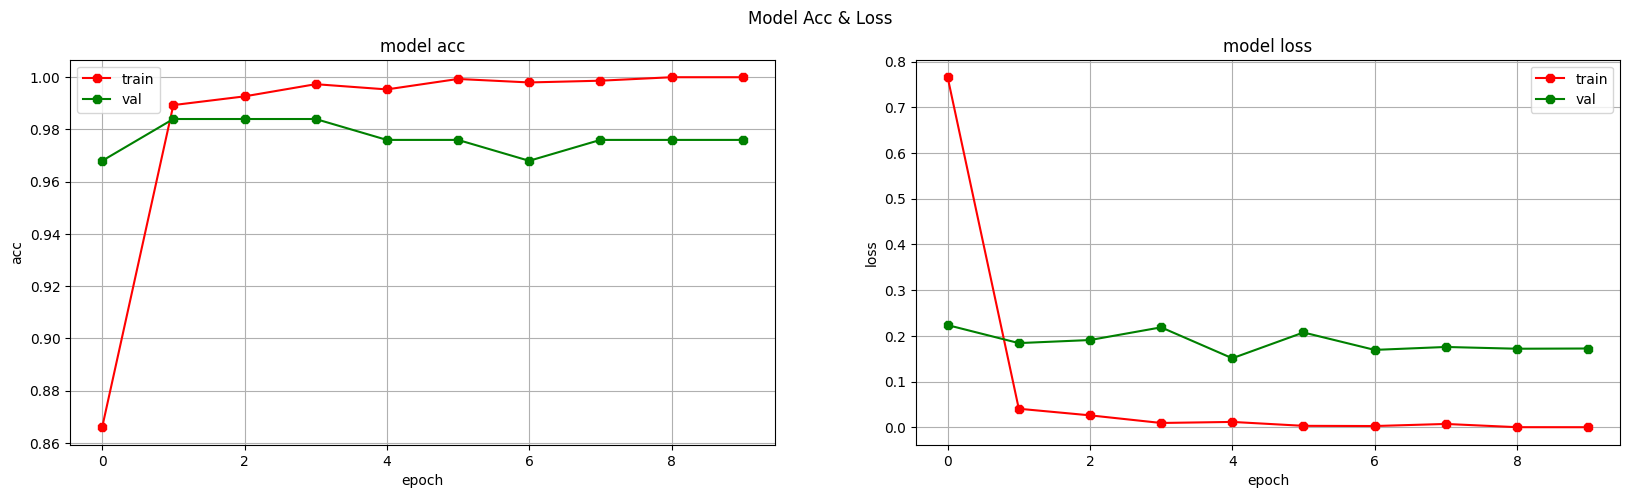

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Model Acc & Loss')


ax[0].set_title('model acc')
ax[1].set_title('model loss')

ax[0].grid()
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('acc')
ax[0].plot(history.history['acc'], marker='8',color='red')
ax[0].plot(history.history['val_acc'], marker='8',color='green')
ax[0].legend(['train', 'val'])

ax[1].grid()
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].plot(history.history['loss'], marker='8',color='red')
ax[1].plot(history.history['val_loss'], marker='8',color='green')
ax[1].legend(['train', 'val'])

plt.show()

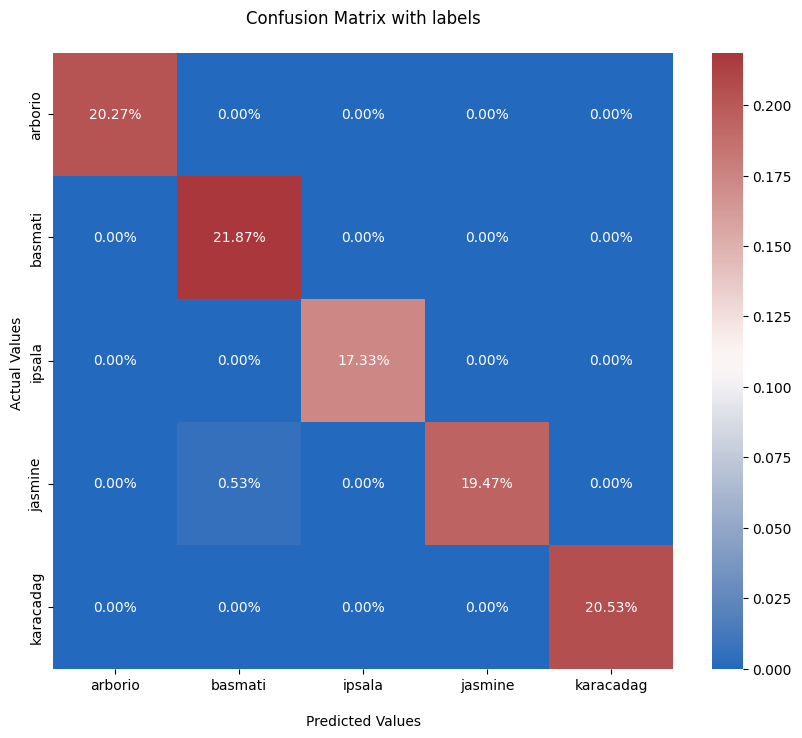

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bool)

plt.figure(figsize=(10,8))

ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='vlag')

ax.set_title('Confusion Matrix with labels\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(df_labels)
ax.yaxis.set_ticklabels(df_labels)

plt.show()